## Cohort Data Analysis using Pandas

* Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('cohorts.csv')

In [3]:
data.head(3)

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [5]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


In [6]:
data.isnull().sum()

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [8]:
data.dtypes

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

In [12]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

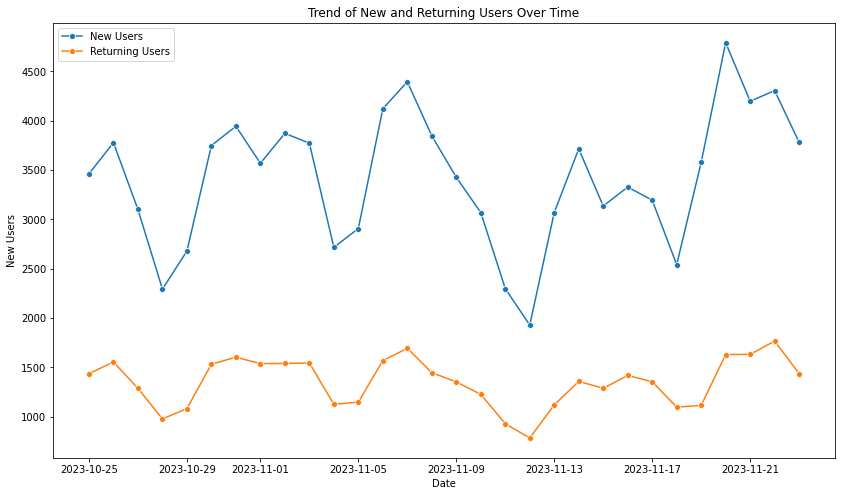

In [28]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(x=data['Date'], y=data['New users'], marker='o', label='New Users')

sns.lineplot(x=data['Date'],y=data['Returning users'],marker='o',label='Returning Users')

ax.set(xlabel='Date',ylabel='New Users', title='Trend of New and Returning Users Over Time')

plt.show()

Trend Over Duration

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Duration'),
 Text(0.5, 1.0, 'Time Series of Durations')]

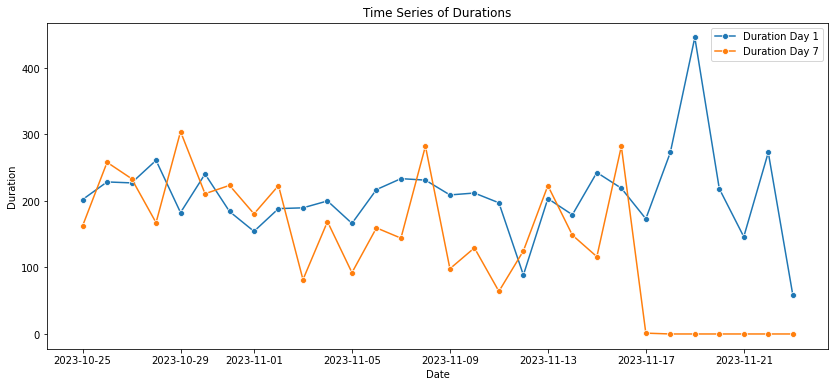

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot lines with markers for 'Duration Day 1' and 'Duration Day 7'
sns.lineplot(x='Date', y='Duration Day 1', marker='o', label='Duration Day 1', data=data, ax=ax)
sns.lineplot(x='Date', y='Duration Day 7', marker='o', label='Duration Day 7', data=data, ax=ax)

# Set labels and title
ax.set(xlabel='Date', ylabel='Duration', title='Time Series of Durations')


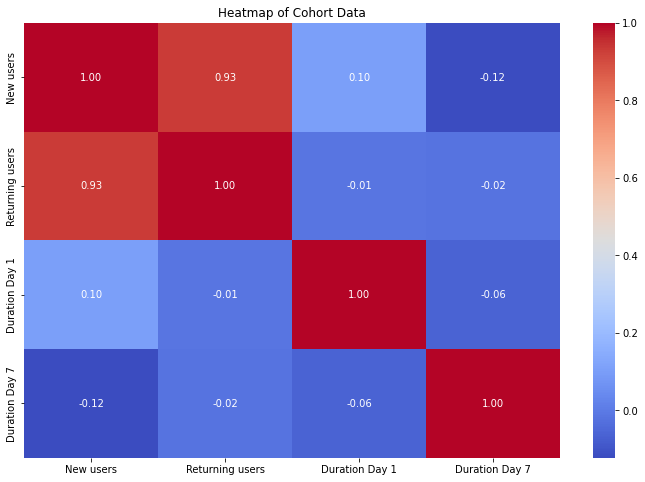

In [36]:
plt.figure(figsize=(12,8))
corrs = data.corr(numeric_only=True)
sns.heatmap(corrs,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of Cohort Data')
plt.show()

In [39]:
data['Week'] = data['Date'].dt.isocalendar().week

In [40]:
data['Week']

0     43
1     43
2     43
3     43
4     43
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    45
13    45
14    45
15    45
16    45
17    45
18    45
19    46
20    46
21    46
22    46
23    46
24    46
25    46
26    47
27    47
28    47
29    47
Name: Week, dtype: UInt32

In [42]:
weekly_avg = data.groupby('Week').agg({
    'New users':'mean',
    'Returning users': 'mean',
    'Duration Day 1' : 'mean',
    'Duration Day 7' : 'mean'
}).reset_index()

In [43]:
weekly_avg

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


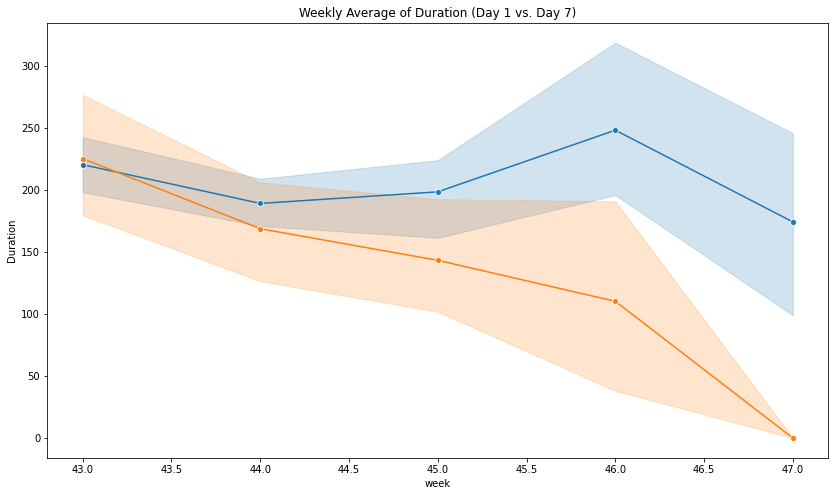

In [55]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(x='Week', y='Duration Day 1',marker='o',data=data)

sns.lineplot(x='Week', y='Duration Day 7',marker='o',data=data)

ax.set(xlabel='week',ylabel='Duration',title='Weekly Average of Duration (Day 1 vs. Day 7)')


plt.show()


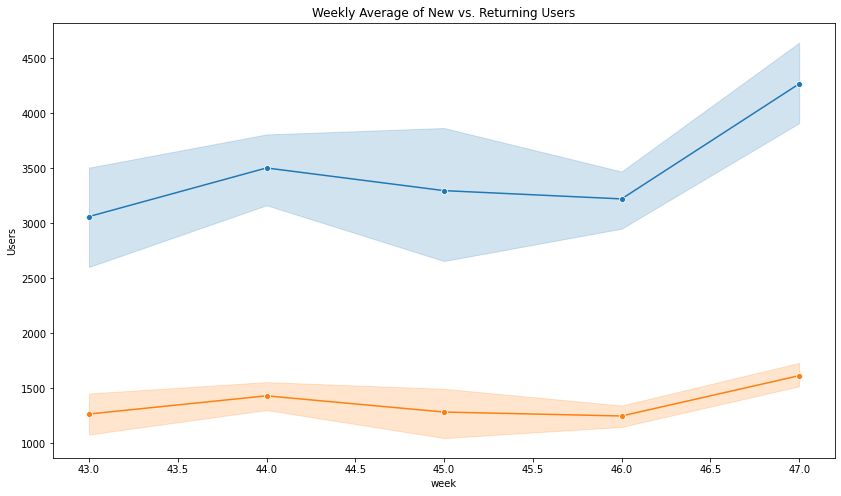

In [56]:
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(x='Week', y='New users',marker='o',data=data)
sns.lineplot(x='Week', y='Returning users',marker='o',data=data)
ax.set(xlabel='week',ylabel='Users',title='Weekly Average of New vs. Returning Users')
plt.show()

### Summary

Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. I hope you liked this article on Cohort Analysis using Python